Text(0, 0.5, 'Posisi Radial, r')

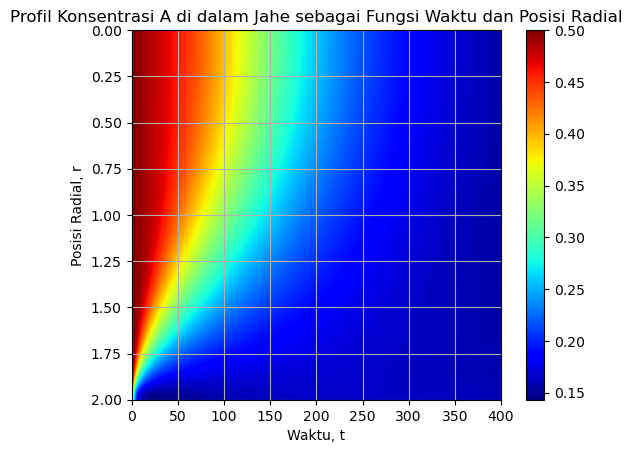

In [9]:
"""
Nama : Liska Dewi Muktiarani
NIM  : 21/477837/TK/52633
"""
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp as sol

#Data Perhitungan
Nr = 30 
Ca0 = 5e-1 
De = 1e-3 
eps = 4e-1 
kr = 1e-3 
VL = 2e3 
R = 2 
Nb = 1e2 
Nt = 401 
t_akhir = 400 
tspan = np.linspace(0,t_akhir,Nt) 
rspan = np.linspace(0,R,Nr) 
dr = rspan[1] - rspan[0] 

#Fungsi 
def ODE(t, Ca): 
    dCadt = np.zeros(Nr+1) 
    #BC 1 (r=0) 
    Ca[0] = (4*Ca[1]-Ca[2])/3 
    #BC 2 (r=R) 
    Ca[-2] = Ca[-1] 
    #PD Parsial 
    for i in range(1,Nr-1): 
        dCadt[i] = De/eps*((Ca[i+1]-2*Ca[i]+Ca[i-1])/dr**2+2/rspan[i]*(Ca[i+1]-Ca[i-1])/2/dr-kr/De*Ca[i]**1.5) 
        dCadt[-1] = -De/VL*Nb*4*np.pi*R**2*(3*Ca[-2]-4*Ca[-3]+Ca[-4])/2/dr 
    return dCadt 

#Main Program
IC = np.zeros(Nr+1) 
IC[0:Nr] = Ca0 
Ca = sol(ODE,t_span=[0,t_akhir],y0=IC,t_eval=tspan).y 

#Recalculation IC, r=0, dan r=R 
Ca[0:Nr,0] = Ca0 
Ca[0,:] = (4*Ca[1,:]-Ca[2,:])/3 
Ca[-2,1:] = Ca[-1,1:] 
Cabola = Ca[0:-2,:] 
Cacairan = Ca[-1,:] 

#Plot Data
plt.figure(0)
plt.imshow(Cabola,cmap='jet', extent =[0,t_final,R,0],aspect = t_akhir/R, interpolation ='bicubic') 
plt.colorbar() 
plt.grid() 
plt.title('Profil Konsentrasi A di dalam Jahe sebagai Fungsi Waktu dan Posisi Radial')
plt.xlabel('Waktu, t') 
plt.ylabel('Posisi Radial, r') 

#Pembahasan
Berdasarkan grafik dapat dilihat bahwa konsentrasi Oleoresin tertinggi terletak saat waktu t = 0 dan posisi radial, r = 0. Semakin jauh posisi radial dari pusat bola (r = R), maka semakin rendah konsentrasi Oleoresin pada jahe, artinya semakin tinggi konsentrasi Oleoresin yang terambil oleh solven. Semakin lama juga proses ekstraksi menggunakan solven berlangsung, maka akan semakin rendah konsentrasi Oleoresin pada jahe dan semakin banyak Oleoresin yang terekstrak pada solven.  

Text(0, 0.5, 'Konsentrasi A, Ca')

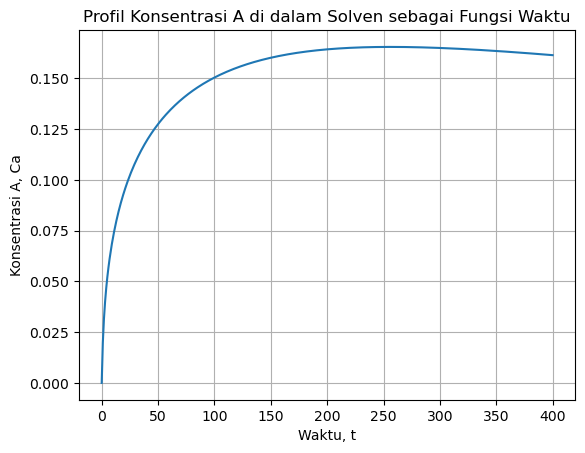

In [10]:
plt.figure(1) 
plt.plot(tspan, Cacairan) 
plt.grid() 
plt.title('Profil Konsentrasi A di dalam Solven sebagai Fungsi Waktu') 
plt.xlabel('Waktu, t') 
plt.ylabel('Konsentrasi A, Ca') 

#Pembahasan
Berdasarkan grafik di atas dapat dilihat bahwa profil konsentrasi Oleoresin pada solven meningkat seiring dengan lamanya waktu reaksi. Perpindahan massa dari Oleoresin menuju solven pada awal reaksi berlangsung cepat hingga pada saat t = 200, kecepatan perpindahan massa berangsur mulai melambat karena gradien konsentrasi antara Oleoresin pada bola dan solven yang semakin berkurang. Dapat disimpulkan bahwa waktu optimum yang dibutuhkan untuk mengekstrak Oleoresin dari jahe adalah kurang lebih t = 200.  